In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud_math = pd.read_csv('stud_math.xls')
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [171]:
#Посмотрим на переменные, которые содержит датасет:
#1 school — аббревиатура школы, в которой учится ученик
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
#3 age — возраст ученика (от 15 до 22)
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
#17 famsup — семейная образовательная поддержка (yes или no)
#18 paid — дополнительные платные занятия по математике (yes или no)
#19 activities — дополнительные внеучебные занятия (yes или no)
#20 nursery — посещал детский сад (yes или no)
#21 higher — хочет получить высшее образование (yes или no)
#22 internet — наличие интернета дома (yes или no)
#23 romantic — в романтических отношениях (yes или no)
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 absences — количество пропущенных занятий
#29 score — баллы по госэкзамену по математике

In [172]:
stud_math.info() # Смотрим оющую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [173]:
stud_math.school # Смотрим информацию о школе, пропусков нет

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

In [174]:
pd.DataFrame(stud_math.school.value_counts())# Смотрим информацию о школе, значений 2

,school
GP,349
MS,46


In [175]:
stud_math.sex # Смотрим информацию о поле, пропусков нет

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

In [176]:
pd.DataFrame(stud_math.sex.value_counts()) # Смотрим информацию о поле, значений 2

,sex
F,208
M,187


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

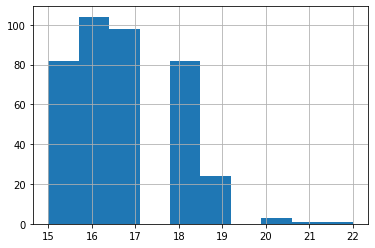

In [177]:
stud_math.age.hist()
stud_math.age.describe() # возраст, пропусков нет, выбросов нет

In [178]:
stud_math.address 

0      U
1      U
2      U
3      U
4      U
      ..
390    U
391    U
392    R
393    R
394    U
Name: address, Length: 395, dtype: object

In [180]:
stud_math.address = stud_math.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.address.value_counts()) # месторасположение, значений 2 , есть пропуски

,address
U,295
R,83
nan,17


In [181]:
stud_math.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [182]:
stud_math.famsize = stud_math.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.famsize.value_counts()) #  значений 2 , есть пропуски

,famsize
GT3,261
LE3,107
nan,27


In [183]:
stud_math.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [185]:
stud_math.Pstatus = stud_math.Pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.Pstatus.value_counts()) # значений 2 , есть пропуски

,Pstatus
T,314
nan,45
A,36


In [186]:
stud_math.loc[:, ['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

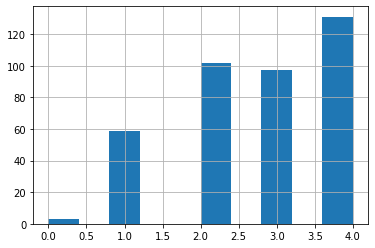

In [208]:
stud_math.Medu.hist()
stud_math.Medu.describe() # выбросов нет , есть пропуски

In [188]:
stud_math.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [189]:
pd.DataFrame(stud_math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

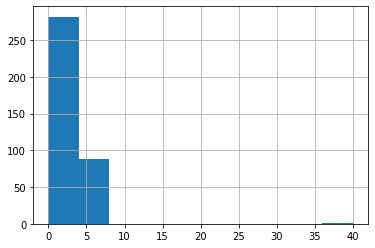

In [190]:
stud_math.Fedu.hist()
stud_math.Fedu.describe() # есть выбросы , есть пропуски

In [191]:
stud_math.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [192]:
pd.DataFrame(stud_math.Fedu.value_counts()) # Выброс 40 - 1 значение

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [224]:
stud_math = stud_math.loc[stud_math.Fedu != 40] # удаляем строку не ясно это значение 0 или 4
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [231]:
pd.DataFrame(stud_math.Mjob.value_counts()) #есть пропуски, значений 5

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32
nan,19


In [228]:
print("Значений, встретившихся в столбце более 10 раз:"
      , (stud_math.Mjob.value_counts()>10).sum())
stud_math.loc[:, ['Mjob']].info()

Значений, встретившихся в столбце более 10 раз: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [234]:
stud_math.Fjob = stud_math.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.Fjob.value_counts()) #есть пропуски, значений 5

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Fjob
other,196
services,102
nan,36
teacher,29
at_home,16
health,15


In [235]:
print("Значений, встретившихся в столбце более 10 раз:"
      , (stud_math.Fjob.value_counts()>10).sum())
stud_math.loc[:, ['Fjob']].info()

Значений, встретившихся в столбце более 10 раз: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [236]:
stud_math.reason = stud_math.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.reason.value_counts()) #есть пропуски, значений 4

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,reason
course,137
home,104
reputation,102
other,34
nan,17


In [237]:
print("Значений, встретившихся в столбце более 10 раз:"
      , (stud_math.reason.value_counts()>10).sum())
stud_math.loc[:, ['reason']].info()

Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [238]:
stud_math.guardian = stud_math.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.guardian.value_counts()) #есть пропуски, значений 3

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,guardian
mother,250
father,85
nan,31
other,28


count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

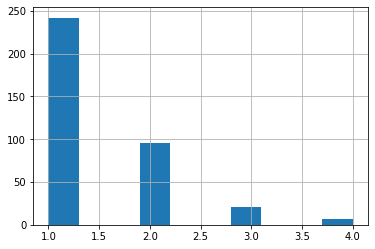

In [239]:
stud_math.traveltime.hist()
stud_math.traveltime.describe() #есть пропуски, выбросов нет

In [240]:
stud_math.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


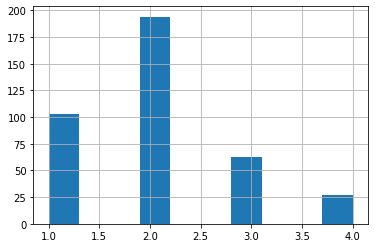

In [241]:
stud_math.studytime.hist()
print(stud_math.studytime.describe())
stud_math.loc[:, ['studytime']].info() #есть пропуски, выбросов нет

count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


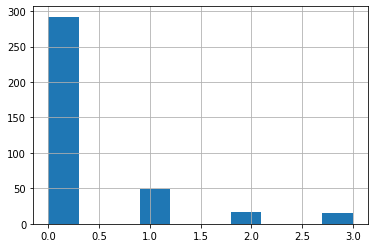

In [242]:
stud_math.failures.hist()
print(stud_math.failures.describe())
stud_math.loc[:, ['failures']].info() #есть пропуски, выбросов нет

In [243]:
stud_math.schoolsup = stud_math.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.schoolsup.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,schoolsup
no,334
yes,51
nan,9


In [244]:
stud_math.famsup = stud_math.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.famsup.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,famsup
yes,218
no,137
nan,39


In [245]:
stud_math.paid = stud_math.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.paid.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,paid
no,199
yes,155
nan,40


In [246]:
stud_math.activities = stud_math.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.activities.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,activities
yes,194
no,186
nan,14


In [247]:
stud_math.nursery = stud_math.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.nursery.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,nursery
yes,299
no,79
nan,16


In [248]:
stud_math.higher = stud_math.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.higher.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,higher
yes,355
nan,20
no,19


In [249]:
stud_math.internet = stud_math.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.internet.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,internet
yes,304
no,56
nan,34


In [250]:
stud_math.romantic = stud_math.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.romantic.value_counts()) #есть пропуски, значений 2

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,romantic
no,239
yes,124
nan,31


In [251]:
pd.DataFrame(stud_math.famrel.value_counts())

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


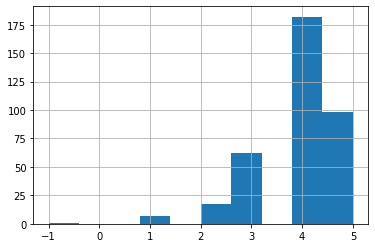

In [252]:
stud_math.famrel.hist()
print(stud_math.famrel.describe())
stud_math.loc[:, ['famrel']].info() #есть пропуски, есть выбросы -1

In [255]:
stud_math.loc[stud_math.famrel != -1.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [256]:
stud_math = stud_math.loc[stud_math.famrel != -1.0] # удаляем
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


count    366.000000
mean       3.948087
std        0.891380
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


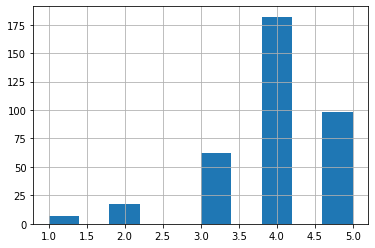

In [257]:
stud_math.famrel.hist()
print(stud_math.famrel.describe())
stud_math.loc[:, ['famrel']].info() # пропуски остались, выбросов нет

In [258]:
pd.DataFrame(stud_math.goout.value_counts())

,goout
3.0,127
2.0,99
4.0,84
5.0,52
1.0,23


count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


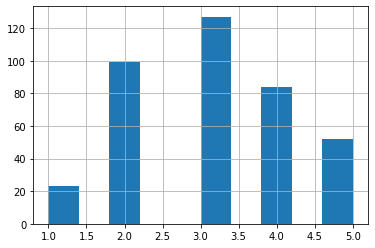

In [259]:
stud_math.goout.hist()
print(stud_math.goout.describe())
stud_math.loc[:, ['goout']].info() # есть пропуски, выбросов нет

In [260]:
pd.DataFrame(stud_math.health.value_counts())

,health
5.0,137
3.0,89
4.0,62
1.0,47
2.0,43


count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


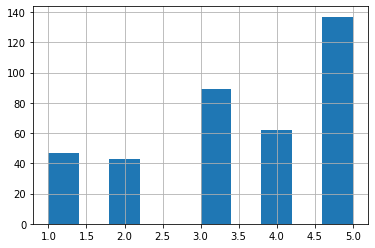

In [261]:
stud_math.health.hist()
print(stud_math.health.describe())
stud_math.loc[:, ['health']].info() # есть пропуски, выбросов нет

In [262]:
pd.DataFrame(stud_math.absences.value_counts())
# есть пропуски, есть выбросы 385 и 212 что меньше - вполне возможные значения пропущенных занятий

,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


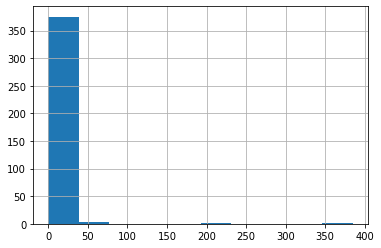

In [264]:
stud_math.absences.hist()
print(stud_math.absences.describe())
stud_math.loc[:, ['absences']].info()

In [266]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# максимальная граница в 20 пропусков это мало, поэтому считаю правильным удалить только значения выше 100

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [272]:
stud_math = stud_math.loc[stud_math.absences != 385.0]
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [273]:
stud_math = stud_math.loc[stud_math.absences != 212.0]
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,nan,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [274]:
pd.DataFrame(stud_math.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


count    379.000000
mean       5.733509
std        8.098286
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  379 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


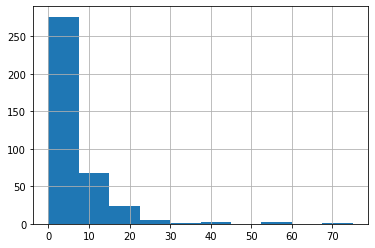

In [275]:
stud_math.absences.hist()
print(stud_math.absences.describe())
stud_math.loc[:, ['absences']].info() # есть пропуски, выбросов нет

In [276]:
pd.DataFrame(stud_math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,30
40.0,30
70.0,27
45.0,26
80.0,16


count    385.000000
mean      52.207792
std       22.962457
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


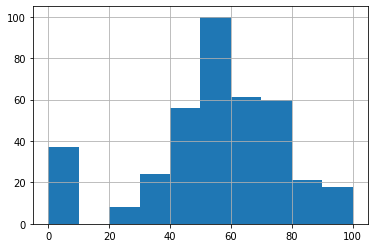

In [277]:
stud_math.score.hist()
print(stud_math.score.describe())
stud_math.loc[:, ['score']].info() # есть пропуски, выбросов нет

In [280]:
stud_math = stud_math.loc[stud_math.score >= 0.0]
stud_math
 # убираем пропуски из ключевого показателя, оставляем только заполненные данные

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,nan,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [281]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.148454,-0.146172,0.086003,-0.016008,0.196061,0.016008,0.048473,-0.002778,0.110421,-0.069323,0.173320,-0.153539
Medu,-0.148454,1.000000,0.627317,-0.167070,0.081194,-0.237536,-0.081194,-0.009959,0.037004,0.067351,-0.045924,0.097811,0.216246
Fedu,-0.146172,0.627317,1.000000,-0.143621,0.011385,-0.269928,-0.011385,-0.022297,-0.011782,0.057473,0.019871,0.040294,0.127676
traveltime,0.086003,-0.167070,-0.143621,1.000000,-0.116940,0.062118,0.116940,-0.050270,-0.017965,0.035816,-0.012281,-0.011134,-0.072577
studytime,-0.016008,0.081194,0.011385,-0.116940,1.000000,-0.175735,-1.000000,0.025671,-0.126727,-0.054790,-0.077206,-0.062146,0.113952
failures,0.196061,-0.237536,-0.269928,0.062118,-0.175735,1.000000,0.175735,-0.009044,0.088347,0.107801,0.080265,0.061698,-0.343346
"studytime, granular",0.016008,-0.081194,-0.011385,0.116940,-1.000000,0.175735,1.000000,-0.025671,0.126727,0.054790,0.077206,0.062146,-0.113952
famrel,0.048473,-0.009959,-0.022297,-0.050270,0.025671,-0.009044,-0.025671,1.000000,0.162295,0.054234,0.097207,-0.041305,0.060615
freetime,-0.002778,0.037004,-0.011782,-0.017965,-0.126727,0.088347,0.126727,0.162295,1.000000,0.289584,0.067850,-0.065789,0.020997
goout,0.110421,0.067351,0.057473,0.035816,-0.054790,0.107801,0.054790,0.054234,0.289584,1.000000,-0.017189,0.040692,-0.123913


In [282]:
# Решаю удалить столбец 'studytime, granular'. в нем находятся отрицательные значения и корреляция его аналогична корреляции столбца "studytime" только отрицательная
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)
stud_math

C:\ProgramFilesAnaconda\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,yes,yes,nan,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [283]:
stud_math.corr()
# еще раз проверим корреляцию. У всех покахателей достаточно низкая корреляция к ключевому признаку "score"

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.148454,-0.146172,0.086003,-0.016008,0.196061,0.048473,-0.002778,0.110421,-0.069323,0.173320,-0.153539
Medu,-0.148454,1.000000,0.627317,-0.167070,0.081194,-0.237536,-0.009959,0.037004,0.067351,-0.045924,0.097811,0.216246
Fedu,-0.146172,0.627317,1.000000,-0.143621,0.011385,-0.269928,-0.022297,-0.011782,0.057473,0.019871,0.040294,0.127676
traveltime,0.086003,-0.167070,-0.143621,1.000000,-0.116940,0.062118,-0.050270,-0.017965,0.035816,-0.012281,-0.011134,-0.072577
studytime,-0.016008,0.081194,0.011385,-0.116940,1.000000,-0.175735,0.025671,-0.126727,-0.054790,-0.077206,-0.062146,0.113952
failures,0.196061,-0.237536,-0.269928,0.062118,-0.175735,1.000000,-0.009044,0.088347,0.107801,0.080265,0.061698,-0.343346
famrel,0.048473,-0.009959,-0.022297,-0.050270,0.025671,-0.009044,1.000000,0.162295,0.054234,0.097207,-0.041305,0.060615
freetime,-0.002778,0.037004,-0.011782,-0.017965,-0.126727,0.088347,0.162295,1.000000,0.289584,0.067850,-0.065789,0.020997
goout,0.110421,0.067351,0.057473,0.035816,-0.054790,0.107801,0.054234,0.289584,1.000000,-0.017189,0.040692,-0.123913
health,-0.069323,-0.045924,0.019871,-0.012281,-0.077206,0.080265,0.097207,0.067850,-0.017189,1.000000,-0.024018,-0.067857


In [285]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      385 non-null    object 
 1   sex         385 non-null    object 
 2   age         385 non-null    int64  
 3   address     385 non-null    object 
 4   famsize     358 non-null    object 
 5   Pstatus     342 non-null    object 
 6   Medu        382 non-null    float64
 7   Fedu        361 non-null    float64
 8   Mjob        385 non-null    object 
 9   Fjob        385 non-null    object 
 10  reason      385 non-null    object 
 11  guardian    385 non-null    object 
 12  traveltime  357 non-null    float64
 13  studytime   378 non-null    float64
 14  failures    363 non-null    float64
 15  schoolsup   385 non-null    object 
 16  famsup      385 non-null    object 
 17  paid        385 non-null    object 
 18  activities  385 non-null    object 
 19  nursery     385 non-null    o

In [296]:
import seaborn as sns
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

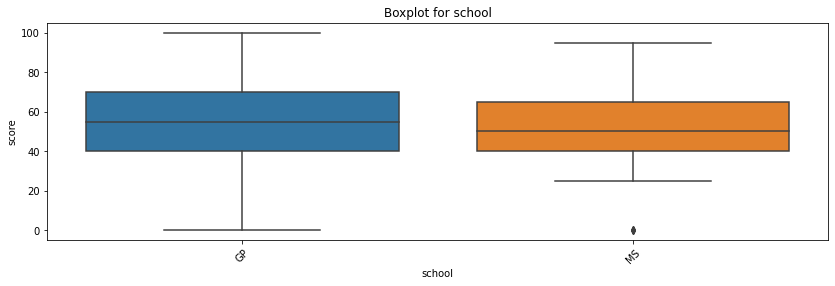

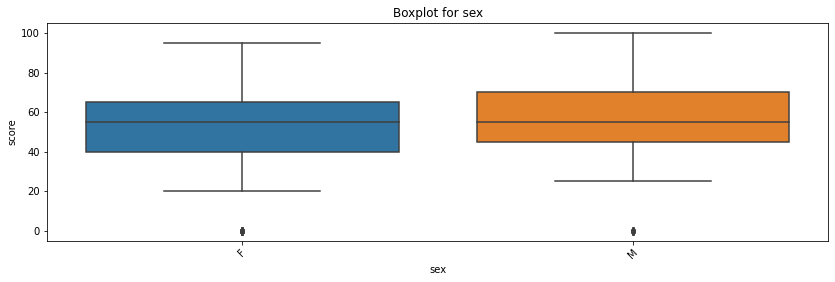

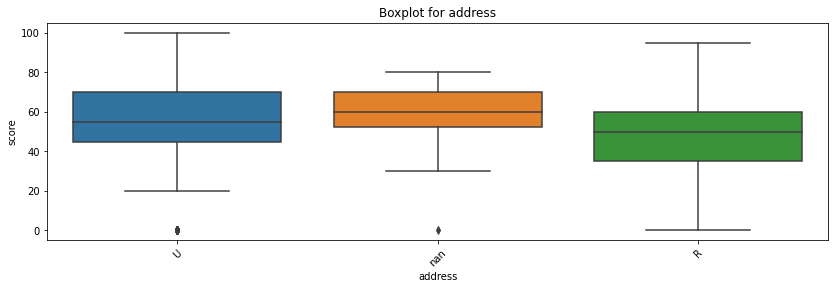

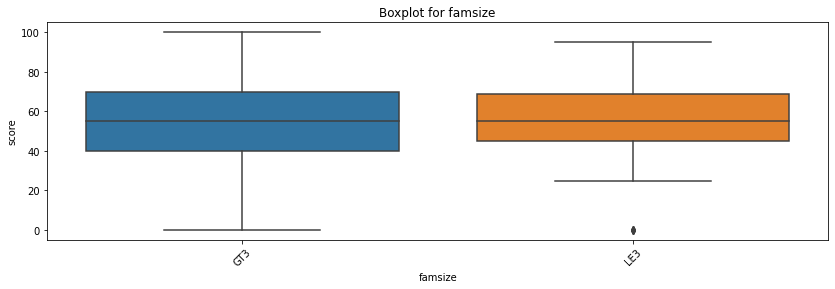

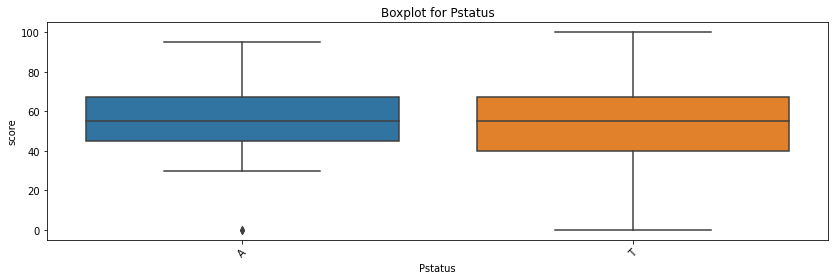

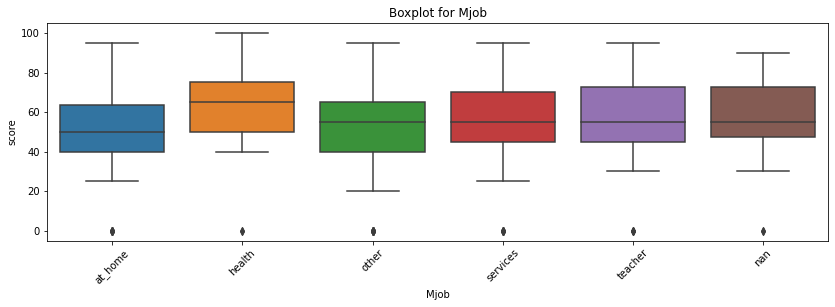

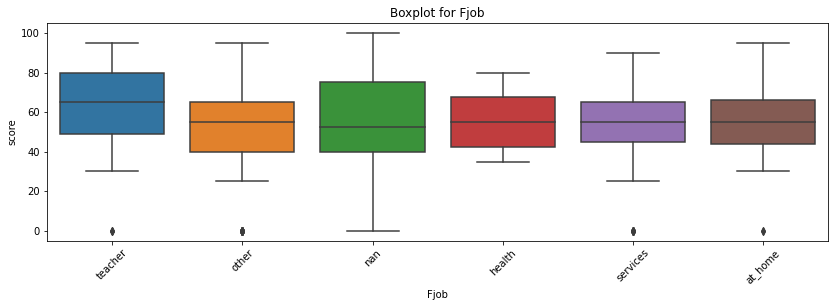

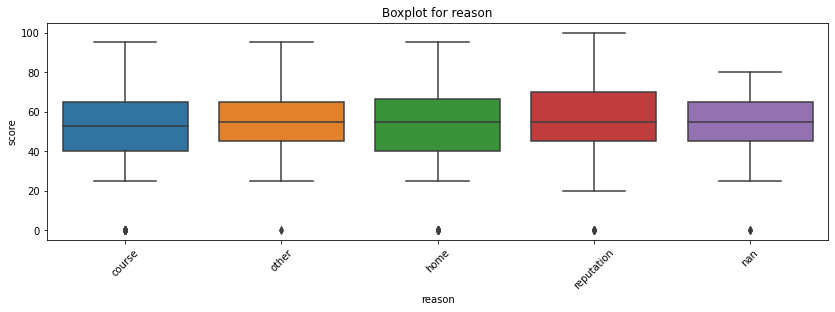

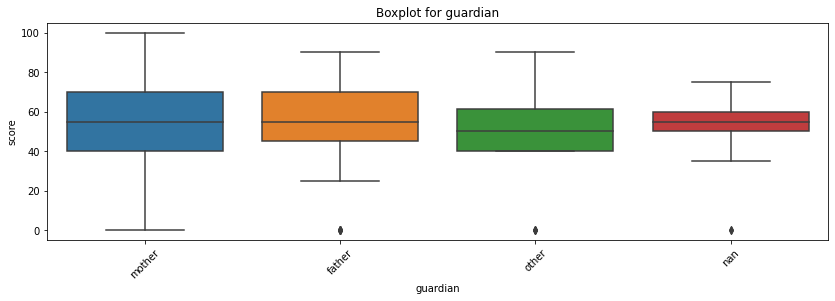

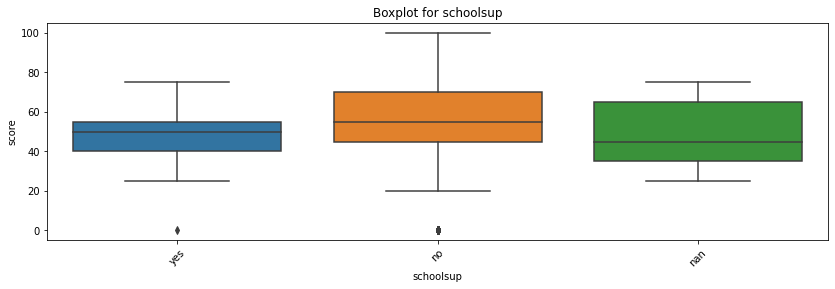

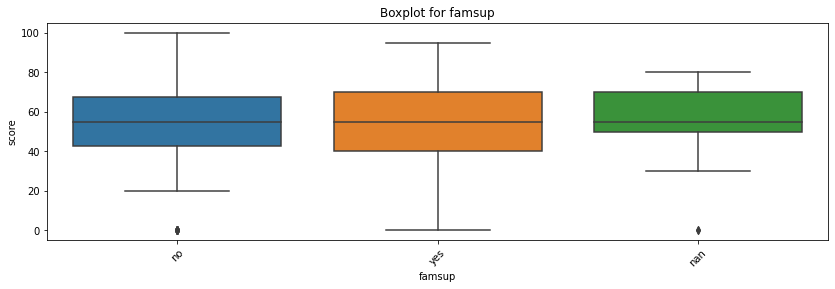

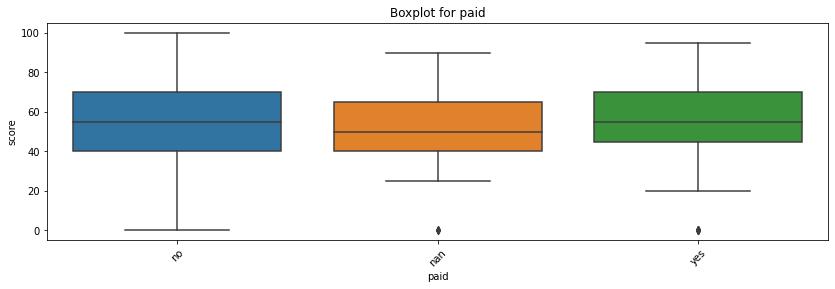

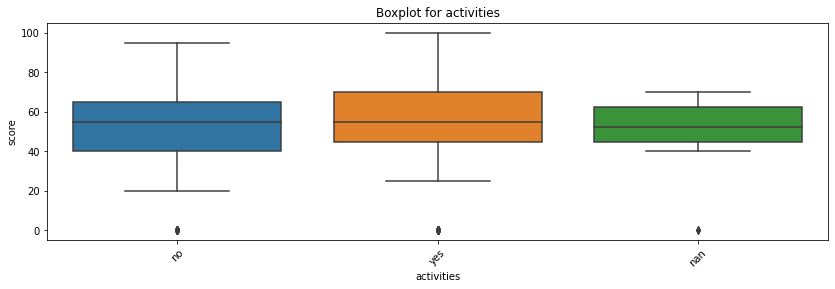

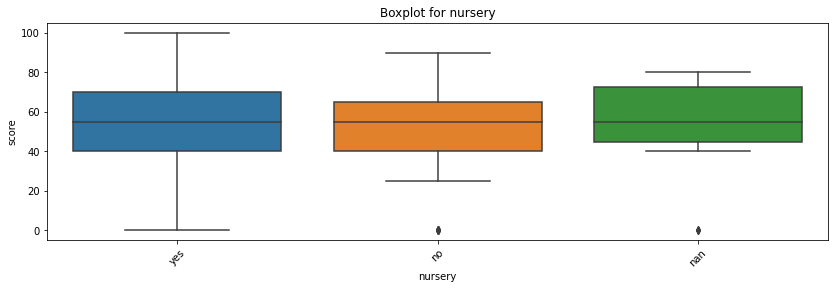

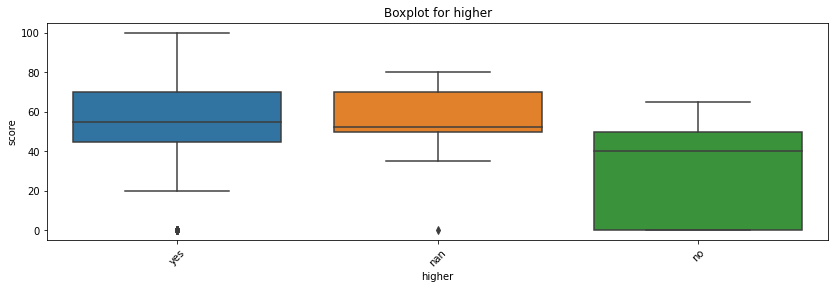

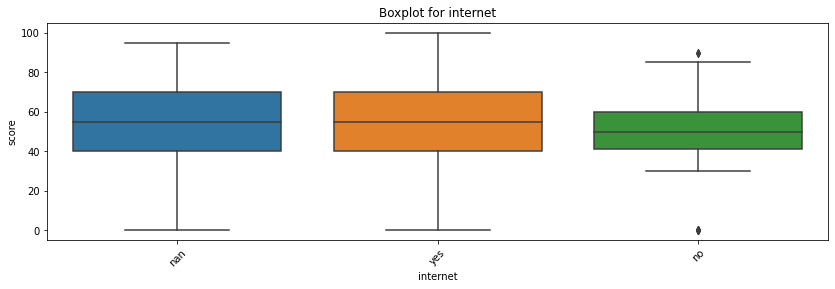

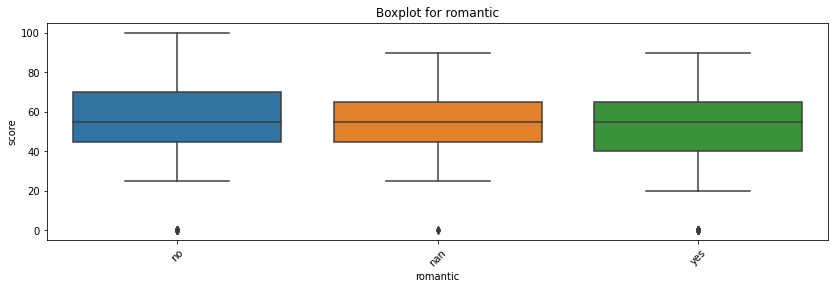

In [298]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [299]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [300]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)
# посте теста Стьюдента найдены три показателя (sex, higher, romantic), которые могут влиять на результат

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [301]:
# Посте корреляционного анализа и проверки номинативных переменных создадим модель версия 1 (stud_math_v1)
stud_math_v1 = stud_math.loc[:, ['sex', 'higher', 'romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
stud_math_v1

,sex,higher,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,F,yes,no,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,F,yes,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,F,yes,nan,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,F,yes,yes,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,F,yes,no,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,F,yes,no,18,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0
391,M,yes,no,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,M,nan,no,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,M,yes,no,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [302]:
stud_math_v1.info()
# В модели присутствуют пропуски. так как данные с пропусками это цифровая классификация или оценка различных значений
# и признаков то замена пропущенных данных на средние или популярные значения приведет к искажению реальных данных.
# Будем удалять пропуски. Удяляем сперва из столбцов с самым наибольним числом пропусков.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         385 non-null    object 
 1   higher      385 non-null    object 
 2   romantic    385 non-null    object 
 3   age         385 non-null    int64  
 4   Medu        382 non-null    float64
 5   Fedu        361 non-null    float64
 6   traveltime  357 non-null    float64
 7   studytime   378 non-null    float64
 8   failures    363 non-null    float64
 9   famrel      358 non-null    float64
 10  freetime    376 non-null    float64
 11  goout       378 non-null    float64
 12  health      370 non-null    float64
 13  absences    374 non-null    float64
 14  score       385 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 48.1+ KB


In [319]:
stud_math_v2 = stud_math_v1.loc[stud_math_v1.traveltime <= 4]
stud_math_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         357 non-null    object 
 1   higher      357 non-null    object 
 2   romantic    357 non-null    object 
 3   age         357 non-null    int64  
 4   Medu        354 non-null    float64
 5   Fedu        336 non-null    float64
 6   traveltime  357 non-null    float64
 7   studytime   351 non-null    float64
 8   failures    337 non-null    float64
 9   famrel      332 non-null    float64
 10  freetime    348 non-null    float64
 11  goout       351 non-null    float64
 12  health      343 non-null    float64
 13  absences    346 non-null    float64
 14  score       357 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 44.6+ KB


In [323]:
stud_math_v3 = stud_math_v2.loc[stud_math_v2.famrel <= 5]
stud_math_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         332 non-null    object 
 1   higher      332 non-null    object 
 2   romantic    332 non-null    object 
 3   age         332 non-null    int64  
 4   Medu        329 non-null    float64
 5   Fedu        314 non-null    float64
 6   traveltime  332 non-null    float64
 7   studytime   326 non-null    float64
 8   failures    312 non-null    float64
 9   famrel      332 non-null    float64
 10  freetime    324 non-null    float64
 11  goout       326 non-null    float64
 12  health      318 non-null    float64
 13  absences    321 non-null    float64
 14  score       332 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 41.5+ KB


In [324]:
stud_math_v4 = stud_math_v3.loc[stud_math_v3.failures >= 0]
stud_math_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         312 non-null    object 
 1   higher      312 non-null    object 
 2   romantic    312 non-null    object 
 3   age         312 non-null    int64  
 4   Medu        309 non-null    float64
 5   Fedu        297 non-null    float64
 6   traveltime  312 non-null    float64
 7   studytime   307 non-null    float64
 8   failures    312 non-null    float64
 9   famrel      312 non-null    float64
 10  freetime    305 non-null    float64
 11  goout       306 non-null    float64
 12  health      300 non-null    float64
 13  absences    301 non-null    float64
 14  score       312 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 39.0+ KB


In [325]:
stud_math_v5 = stud_math_v4.loc[stud_math_v4.Fedu >= 0]
stud_math_v5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         297 non-null    object 
 1   higher      297 non-null    object 
 2   romantic    297 non-null    object 
 3   age         297 non-null    int64  
 4   Medu        294 non-null    float64
 5   Fedu        297 non-null    float64
 6   traveltime  297 non-null    float64
 7   studytime   292 non-null    float64
 8   failures    297 non-null    float64
 9   famrel      297 non-null    float64
 10  freetime    290 non-null    float64
 11  goout       291 non-null    float64
 12  health      286 non-null    float64
 13  absences    286 non-null    float64
 14  score       297 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 37.1+ KB


In [326]:
stud_math_v6 = stud_math_v5.loc[stud_math_v5.absences >= 0]
stud_math_v6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         286 non-null    object 
 1   higher      286 non-null    object 
 2   romantic    286 non-null    object 
 3   age         286 non-null    int64  
 4   Medu        283 non-null    float64
 5   Fedu        286 non-null    float64
 6   traveltime  286 non-null    float64
 7   studytime   283 non-null    float64
 8   failures    286 non-null    float64
 9   famrel      286 non-null    float64
 10  freetime    279 non-null    float64
 11  goout       280 non-null    float64
 12  health      275 non-null    float64
 13  absences    286 non-null    float64
 14  score       286 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 35.8+ KB


In [327]:
stud_math_v7 = stud_math_v6.loc[stud_math_v6.health >= 0]
stud_math_v7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         275 non-null    object 
 1   higher      275 non-null    object 
 2   romantic    275 non-null    object 
 3   age         275 non-null    int64  
 4   Medu        272 non-null    float64
 5   Fedu        275 non-null    float64
 6   traveltime  275 non-null    float64
 7   studytime   273 non-null    float64
 8   failures    275 non-null    float64
 9   famrel      275 non-null    float64
 10  freetime    268 non-null    float64
 11  goout       269 non-null    float64
 12  health      275 non-null    float64
 13  absences    275 non-null    float64
 14  score       275 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 34.4+ KB


In [328]:
stud_math_v8 = stud_math_v7.loc[stud_math_v7.freetime >= 0]
stud_math_v8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         268 non-null    object 
 1   higher      268 non-null    object 
 2   romantic    268 non-null    object 
 3   age         268 non-null    int64  
 4   Medu        265 non-null    float64
 5   Fedu        268 non-null    float64
 6   traveltime  268 non-null    float64
 7   studytime   267 non-null    float64
 8   failures    268 non-null    float64
 9   famrel      268 non-null    float64
 10  freetime    268 non-null    float64
 11  goout       262 non-null    float64
 12  health      268 non-null    float64
 13  absences    268 non-null    float64
 14  score       268 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 33.5+ KB


In [329]:
stud_math_v9 = stud_math_v8.loc[stud_math_v8.goout >= 0]
stud_math_v9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         262 non-null    object 
 1   higher      262 non-null    object 
 2   romantic    262 non-null    object 
 3   age         262 non-null    int64  
 4   Medu        260 non-null    float64
 5   Fedu        262 non-null    float64
 6   traveltime  262 non-null    float64
 7   studytime   261 non-null    float64
 8   failures    262 non-null    float64
 9   famrel      262 non-null    float64
 10  freetime    262 non-null    float64
 11  goout       262 non-null    float64
 12  health      262 non-null    float64
 13  absences    262 non-null    float64
 14  score       262 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 32.8+ KB


In [330]:
stud_math_v10 = stud_math_v9.loc[stud_math_v9.Medu >= 0]
stud_math_v10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         260 non-null    object 
 1   higher      260 non-null    object 
 2   romantic    260 non-null    object 
 3   age         260 non-null    int64  
 4   Medu        260 non-null    float64
 5   Fedu        260 non-null    float64
 6   traveltime  260 non-null    float64
 7   studytime   259 non-null    float64
 8   failures    260 non-null    float64
 9   famrel      260 non-null    float64
 10  freetime    260 non-null    float64
 11  goout       260 non-null    float64
 12  health      260 non-null    float64
 13  absences    260 non-null    float64
 14  score       260 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 32.5+ KB


In [331]:
stud_math_v11 = stud_math_v10.loc[stud_math_v10.studytime >= 0]
stud_math_v11.info()
# Пропусков больше нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         259 non-null    object 
 1   higher      259 non-null    object 
 2   romantic    259 non-null    object 
 3   age         259 non-null    int64  
 4   Medu        259 non-null    float64
 5   Fedu        259 non-null    float64
 6   traveltime  259 non-null    float64
 7   studytime   259 non-null    float64
 8   failures    259 non-null    float64
 9   famrel      259 non-null    float64
 10  freetime    259 non-null    float64
 11  goout       259 non-null    float64
 12  health      259 non-null    float64
 13  absences    259 non-null    float64
 14  score       259 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 32.4+ KB
